In [3]:
import math as ma
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time as ti
import scipy.linalg as la
import scipy
from scipy.integrate import odeint
import copy
from matplotlib.colors import LogNorm
def Returner(S,I,popsize):
    u=[]
    for i in range(popsize+1):
        for j in range(popsize+1):
            u.append([j,i])
    return u.index([S,I])
def Returnerinv(k,popsize):
    u=[]
    for i in range(popsize+1):
        for j in range(popsize+1):
            u.append([j,i])
    return u[k]       
def pa(S,I,N,beta,gamma):
    if I==0 or S+I>N:
        return [0]
    else:
        return [[S+1,I-1], beta*(I-1)*(S+1)]
        
def pb(S,I,N,beta,gamma):
    if N-S-I==0 or S+I>N:
        return [0]
    else: 
        return [[S,I+1], gamma*(I+1)]  
        
def pc(S,I,N,beta,gamma,zeta):
    if S+I>N:
        return [0]
    else:
        return [[S,I], -beta*S*I-gamma*I-zeta*(N-S-I)]
        
def pd(S,I,N,beta,gamma,zeta):
    if S==0 or S+I>N:
        return [0]
    else: 
        return [[S-1,I], zeta*(N-S-I+1)]    
        
def vec_creator(S,I,N,beta,gamma,zeta):
    vvector=[0.0 for i in range ((N+1)*(N+1))]
    if len(pa(S,I,N,beta,gamma))==2:
        a=pa(S,I,N,beta,gamma)
        vvector[Returner(a[0][0],a[0][1],N)]=a[1]
    if len(pb(S,I,N,beta,gamma))==2:
        b=pb(S,I,N,beta,gamma)
        #print(Returner(b[0][0],b[0][1],N))
        vvector[Returner(b[0][0],b[0][1],N)]=b[1]
    if len(pc(S,I,N,beta,gamma,zeta))==2:
        c=pc(S,I,N,beta,gamma,zeta)
        vvector[Returner(c[0][0],c[0][1],N)]=c[1]
    if len(pd(S,I,N,beta,gamma,zeta))==2:
        d=pd(S,I,N,beta,gamma,zeta)
        vvector[Returner(d[0][0],d[0][1],N)]=d[1]
    return vvector
#print(vec_creator(2,1,2,1,5))
    


def Matrix_form_generator(popsize,beta,gamma,zeta):
    siuuu=[]
    for i in range(popsize+1):
        for j in range(popsize+1):
            #print(j,i)
            siuuu.append(vec_creator(j,i,popsize,beta,gamma,zeta))
    return np.array(siuuu).T

def phase_plotter(pvec,popsize,name,boole,title):
    #print(np.sum(pvec))
    phase_matrix=[[0.0 for i in range(popsize+1)]for j in range(popsize+1)]
    for i in range(popsize+1):
        for j in range(popsize+1): 
            phase_matrix[j][i]=pvec[Returner(j,i,popsize)]
    phase_matrix=np.array(phase_matrix)
    #fig=sns.heatmap(phase_matrix.T,cbar=boole) #vmax=0.1
    fig=sns.heatmap(phase_matrix.T,cmap="YlOrBr",norm=LogNorm(vmin=0.0001, vmax=1))
    plt.title(title)
    plt.xlabel("Susceptible individuals")
    plt.ylabel("Infectious individuals")
    plt.ylim(0,popsize+1)
    plt.xlim(0,popsize+1)
    #plt.savefig("images2/"+str(name)+".png")
    #plt.close()
    return
def prom(yvec):
    prom=0
    for i in range(len(yvec)): 
        prom+=i*yvec[i]
    return prom
popsize=50
beta=3.0
gamma=0.5
zeta=1.0
I0=5
R0=0
S0=popsize-I0-R0 #R0=0
A=Matrix_form_generator(popsize,beta/popsize,gamma,zeta)
print("The evolution matrix has been generated, the size is ", A.shape)
def deriv(y, t, N, beta, gamma,zeta):
    S, I, R = y
    dSdt = -beta * S * I / N + zeta * R
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I - zeta * R 
    return dSdt, dIdt, dRdt


y0=[0.0 for i in range((popsize+1)*(popsize+1))]
y0[Returner(S0,I0,popsize)]=1.0
y0=np.array(y0)
dt=0.03
npuntos=150
times=[0.0+i*dt for i in range(npuntos)]
times=np.array(times)
yvalp=y0
Liu=la.expm(dt*A)
print("exp(dt*A) has been calculated")
prob0=[]
prob1=[]
prob2=[]
tmat=[]
print("I've calculated ", 0, " times from ",npuntos) 
# The SIR model differential equations.
N=popsize
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
t=times
def det_plotter(y0,t,N,beta,gamma,zeta,i):
    ret = odeint(deriv, y0, t[:i+1], args=(N, beta, gamma,zeta))
    S, I, R = ret.T    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    plt.title("t="+"{0:.2f}".format(t[i]))
    plt.xlabel("Susceptible individuals")
    plt.ylabel("Infectious individuals")
    plt.ylim(0,N+1)
    plt.xlim(0,N+1)
    #plt.scatter(S[-1],I[-1],marker="X",color="black")
    #plt.plot(S,I,"--",color="gray")
    plt.savefig("imagesSIRS/"+str(i)+"f.png")
    #plt.show()
    plt.close()
for i in range(npuntos):
    if i==npuntos-1:
        phase_plotter(yvalp,popsize,i+1,True,"t="+"{0:.2f}".format(i*dt))
        det_plotter(y0,t[:i+1],N,beta,gamma,zeta,i)
    yval = np.dot(yvalp,Liu)
    print("I've calculated ", i, " times from ",npuntos,end="\r") 
    yvalp=yval


The evolution matrix has been generated, the size is  (2601, 2601)
exp(dt*A) has been calculated
I've calculated  0  times from  150


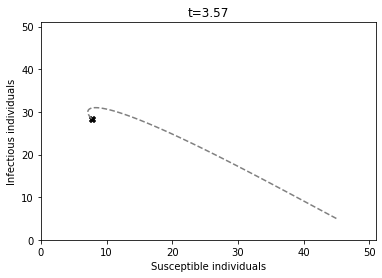